In [ ]:
# Instalación de paquetes necesarios
!pip install ultralytics -q
!pip install roboflow -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.6/779.6 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 55.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.5/75.5 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.2 MB/s eta 0:00:00


In [ ]:
# Importación de librerías
import glob
import os

from IPython.display import display, Image
from roboflow import Roboflow
import tensorflow as tf
from ultralytics import YOLO

In [ ]:
# Define el directorio de trabajo actual
HOME = os.getcwd()
HOME

'/content'

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

rf = Roboflow(api_key="Rcgu7Do5K7W1l9EsCRV4")
project = rf.workspace("kowalsky-bank").project("kowalsky-bank")
version = project.version(5)
dataset = version.download("yolov8")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.27, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Kowalsky-Bank-5 in yolov8:: 100%|██████████| 4812/4812 [00:01<00:00, 2633.49it/s]


In [ ]:
%cd {HOME}

# Configuración y entrenamiento del modelo YOLO
model = YOLO("yolov8n.pt")  # Cargar el modelo preentrenado
model.train(data=f"{dataset.location}/data.yaml", epochs=10, imgsz=640, plots=True)

/content


100%|██████████| 6.23M/6.23M [00:00<00:00, 137MB/s]


Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/datasets/Kowalsky-Bank-5/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show

100%|██████████| 755k/755k [00:00<00:00, 28.3MB/s]

Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 225 layers, 3011823 parameters, 3011807 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
TensorBoard: Start with 'tensorboard --logdir runs/detect/train', view at http://localhost:6006/
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)


AMP: checks passed ✅


train: Scanning /content/datasets/Kowalsky-Bank-5/train/labels... 2100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2100/2100 [00:01<00:00, 1347.70it/s]


train: New cache created: /content/datasets/Kowalsky-Bank-5/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/datasets/Kowalsky-Bank-5/valid/labels... 200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:00<00:00, 803.54it/s]

val: New cache created: /content/datasets/Kowalsky-Bank-5/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.62G     0.5673      2.566      1.193          4        640: 100%|██████████| 132/132 [01:03<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/7 [00:00<?, ?it/s]Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.51it/s]

                   all        200        200      0.832      0.805      0.963      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10       2.3G     0.4381      1.394      1.051          4        640: 100%|██████████| 132/132 [00:44<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.37it/s]

                   all        200        200      0.951      0.969      0.986      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10       2.3G      0.423      1.086      1.019          4        640: 100%|██████████| 132/132 [00:51<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.45it/s]


                   all        200        200      0.965      0.941      0.988      0.928

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.29G     0.3737     0.8268     0.9828          4        640: 100%|██████████| 132/132 [00:49<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.31it/s]

                   all        200        200      0.981      0.998      0.995      0.947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10       2.3G     0.3652     0.6853      0.959          4        640: 100%|██████████| 132/132 [00:45<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.60it/s]

                   all        200        200      0.972      0.983      0.992      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10       2.3G     0.3037     0.5589     0.9272          4        640: 100%|██████████| 132/132 [00:49<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.25it/s]


                   all        200        200      0.988      0.983      0.995      0.968

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10       2.3G     0.2771     0.4992     0.9047          4        640: 100%|██████████| 132/132 [00:49<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.13it/s]

                   all        200        200      0.998          1      0.995      0.983



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10       2.3G     0.2526     0.4189     0.8928          4        640: 100%|██████████| 132/132 [00:45<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]

                   all        200        200      0.995          1      0.995      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10       2.3G      0.221     0.3656     0.8877          4        640: 100%|██████████| 132/132 [00:50<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.38it/s]

                   all        200        200      0.991      0.994      0.995      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10       2.3G     0.2022     0.3364      0.872          4        640: 100%|██████████| 132/132 [00:47<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.31it/s]

                   all        200        200      0.997          1      0.995      0.992



10 epochs completed in 0.150 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.41it/s]


                   all        200        200      0.997          1      0.995      0.992
           billete_10k         42         42      0.998          1      0.995      0.989
           billete_20K         45         45      0.998          1      0.995      0.993
            billete_2k         38         38      0.993          1      0.995      0.995
           billete_50k         37         37      0.998          1      0.995       0.99
            billete_5k         38         38      0.997          1      0.995      0.991
Speed: 0.3ms preprocess, 2.7ms inference, 0.0ms loss, 4.4ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b43bfe9f9d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

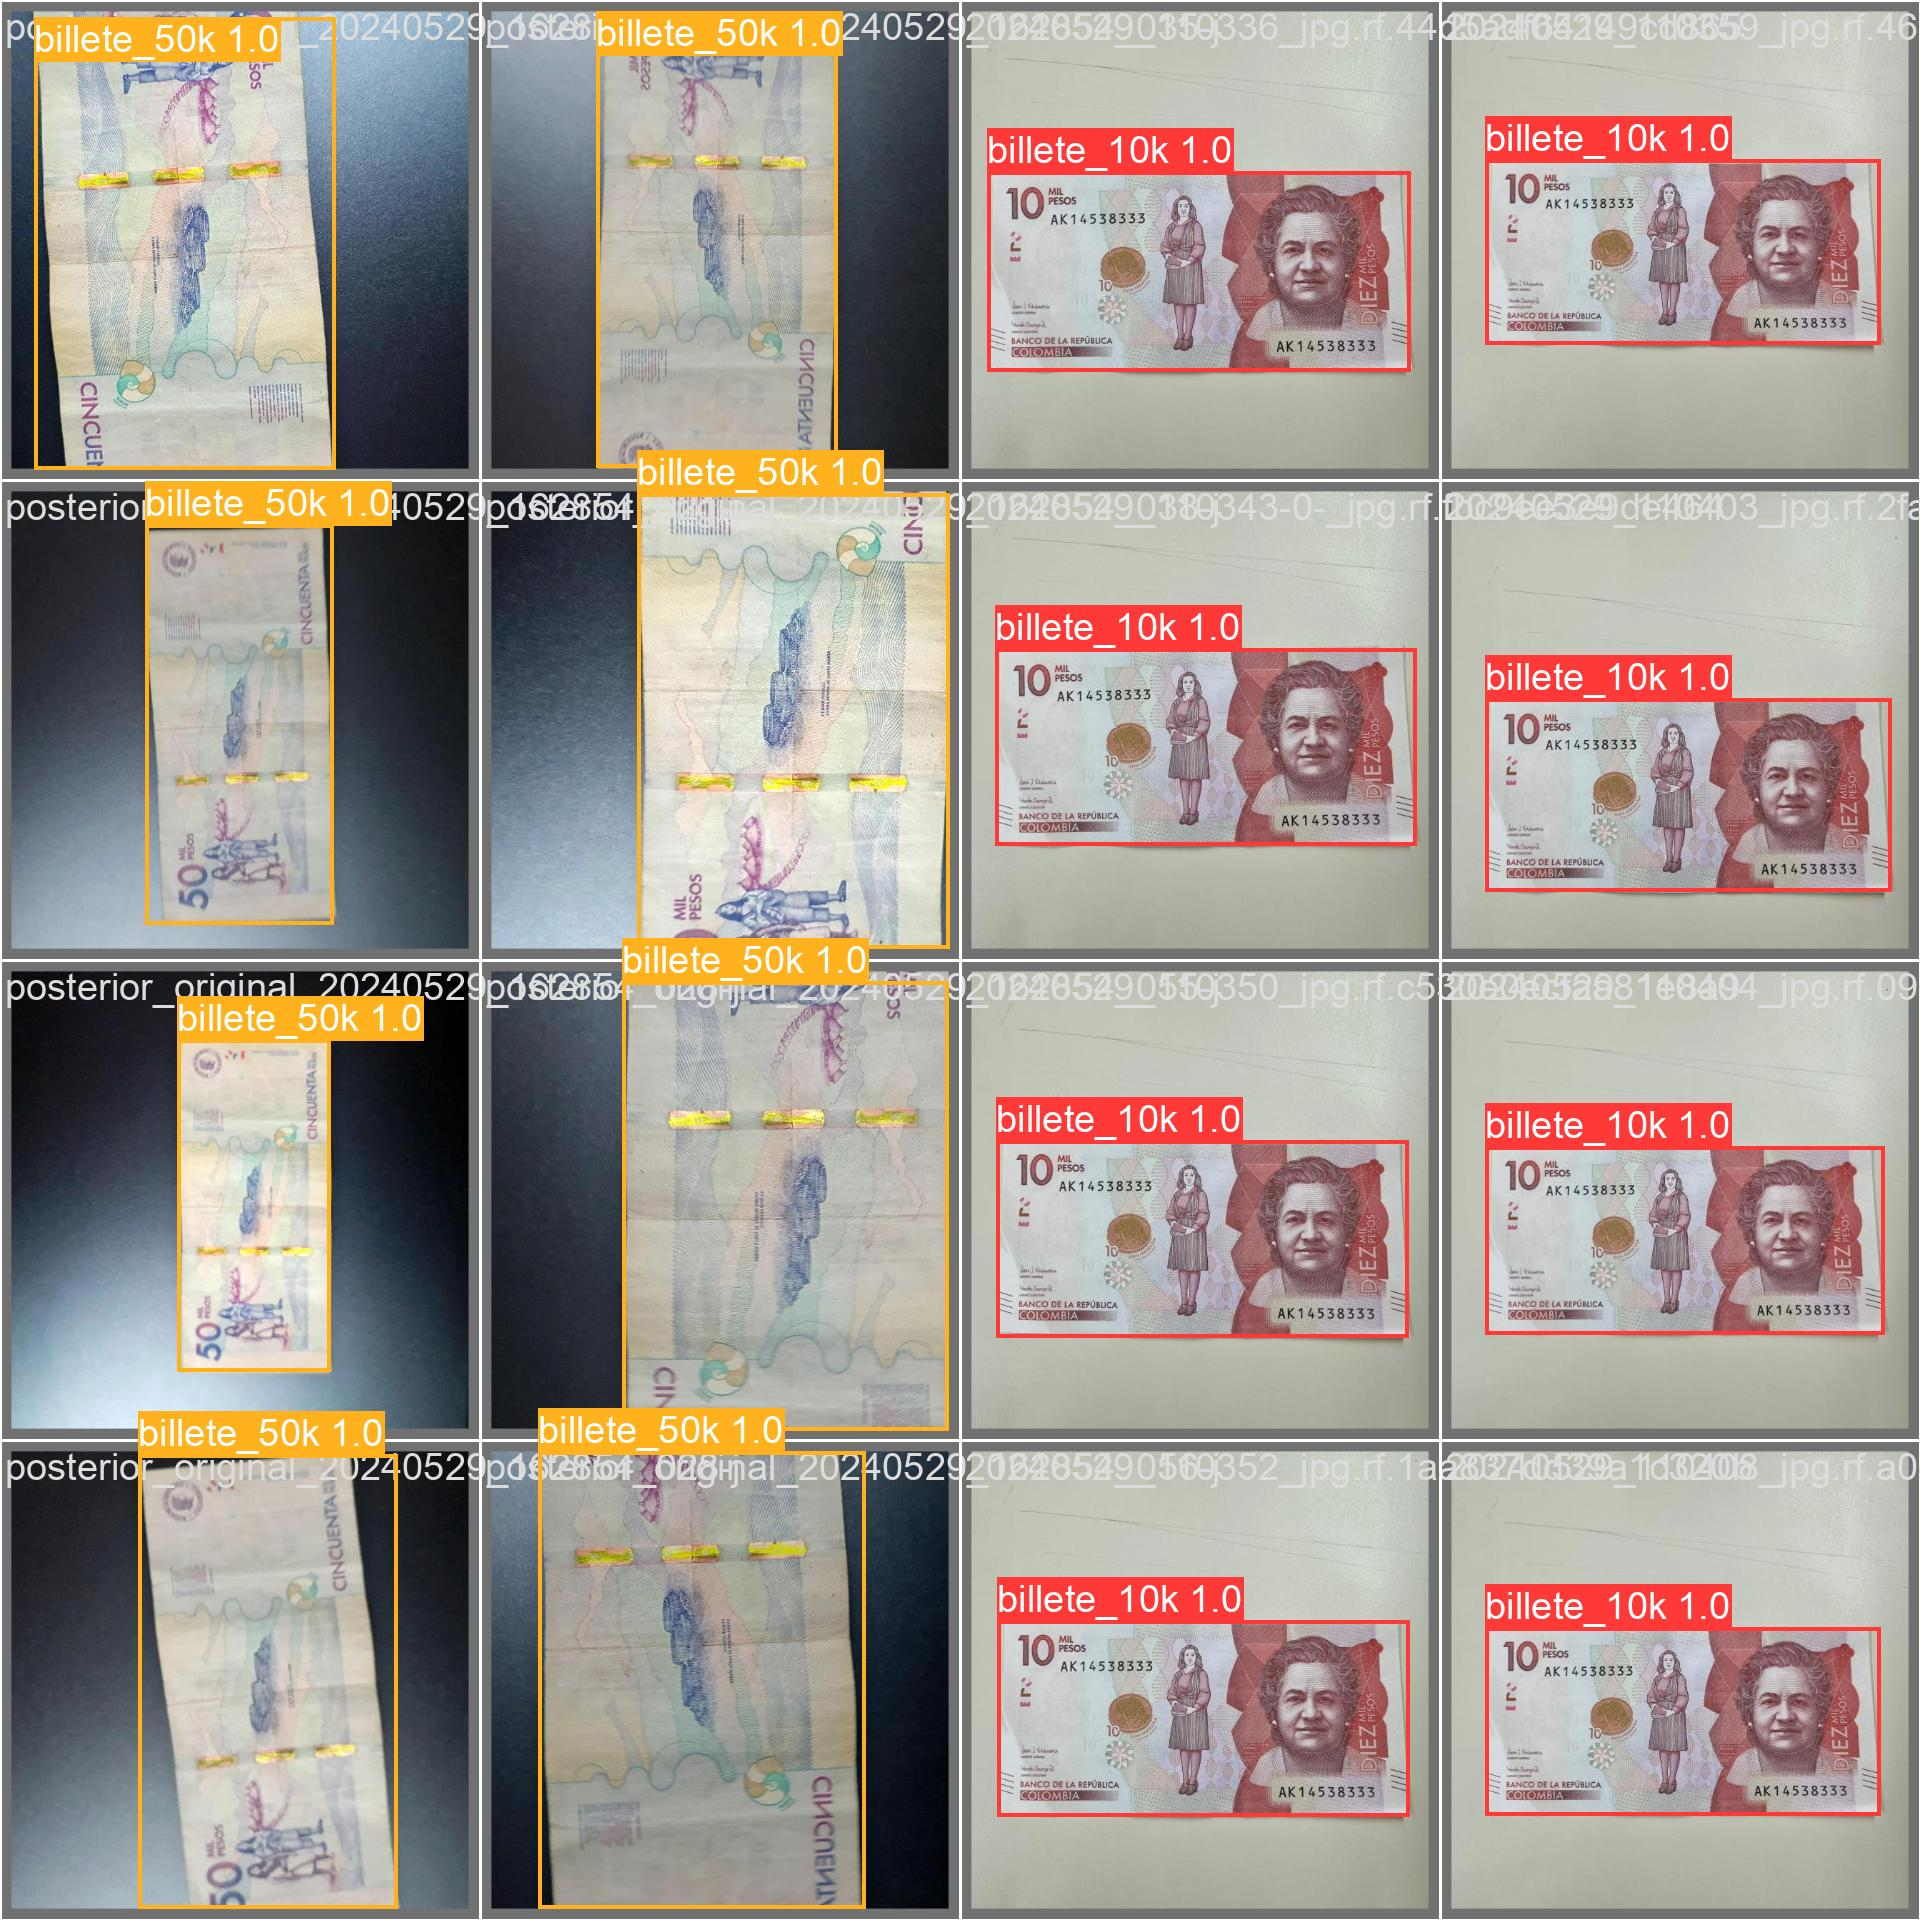

In [ ]:
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=640)

In [ ]:
# Renombrar el archivo best.pt
kowalskibank = f'{HOME}/runs/detect/train/weights/best.pt'
version_yolo = glob.glob("/content/*.pt")[0].split('yolov')[-1].split('.')[0]
os.rename(kowalskibank, os.path.join(os.path.dirname(kowalskibank), f"kowalskibank_yolov{version_yolo}.pt"))

In [ ]:
kowalskibank = os.path.join(os.path.dirname(kowalskibank), f"kowalskibank_yolov{version_yolo}.pt")
model = YOLO(kowalskibank)  # Cargar modelo entrenado

In [ ]:
# Validar el modelo
validation_results = model.val()

Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/datasets/Kowalsky-Bank-5/valid/labels.cache... 200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:00<?, ?it/s]
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.87it/s]


                   all        200        200      0.997          1      0.995      0.992
           billete_10k         42         42      0.998          1      0.995      0.989
           billete_20K         45         45      0.998          1      0.995      0.993
            billete_2k         38         38      0.994          1      0.995      0.995
           billete_50k         37         37      0.998          1      0.995       0.99
            billete_5k         38         38      0.997          1      0.995      0.991
Speed: 0.4ms preprocess, 6.9ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/detect/val


In [ ]:
# Ejecutar la tarea de segmentación
results = model(source=f'{dataset.location}/test/images', conf=0.25, save=True)


image 1/100 /content/datasets/Kowalsky-Bank-5/test/images/20240529_110355_jpg.rf.9cfcfc085708bf2a946c4e0b57a348d2.jpg: 640x640 1 billete_10k, 7.3ms
image 2/100 /content/datasets/Kowalsky-Bank-5/test/images/20240529_110404-0-_jpg.rf.f7294f0bdb63191b84c2881839730102.jpg: 640x640 1 billete_10k, 7.3ms
image 3/100 /content/datasets/Kowalsky-Bank-5/test/images/20240529_110853-0-_jpg.rf.656d2dd2c96c80ce7a18a6009df71f5c.jpg: 640x640 1 billete_20K, 7.3ms
image 4/100 /content/datasets/Kowalsky-Bank-5/test/images/20240529_110901_jpg.rf.43f7d45ff085d134782c5cdace365e1f.jpg: 640x640 1 billete_20K, 7.3ms
image 5/100 /content/datasets/Kowalsky-Bank-5/test/images/20240529_110904-1-_jpg.rf.5a0eeec7afe349d307dcb0a57c484c48.jpg: 640x640 1 billete_20K, 7.3ms
image 6/100 /content/datasets/Kowalsky-Bank-5/test/images/20240529_110906_jpg.rf.ea5b57b64e69aa3baf2f8bed9c809b06.jpg: 640x640 1 billete_20K, 7.3ms
image 7/100 /content/datasets/Kowalsky-Bank-5/test/images/20240529_110914_022_jpg.rf.1b89bee592106abf9

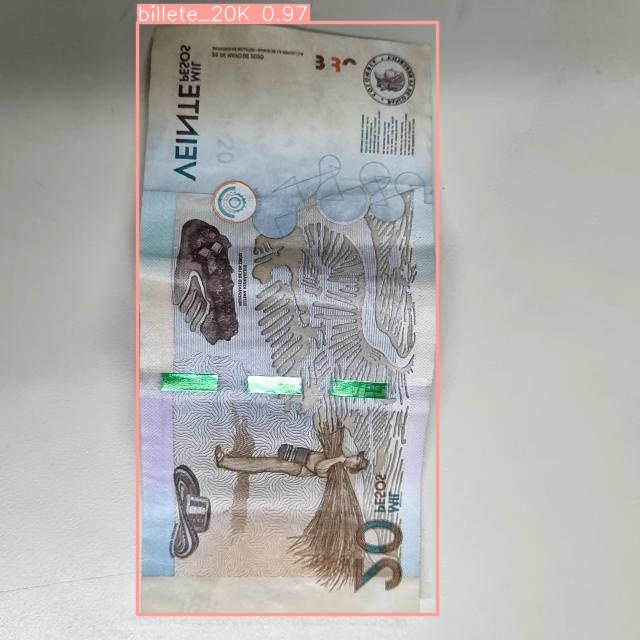

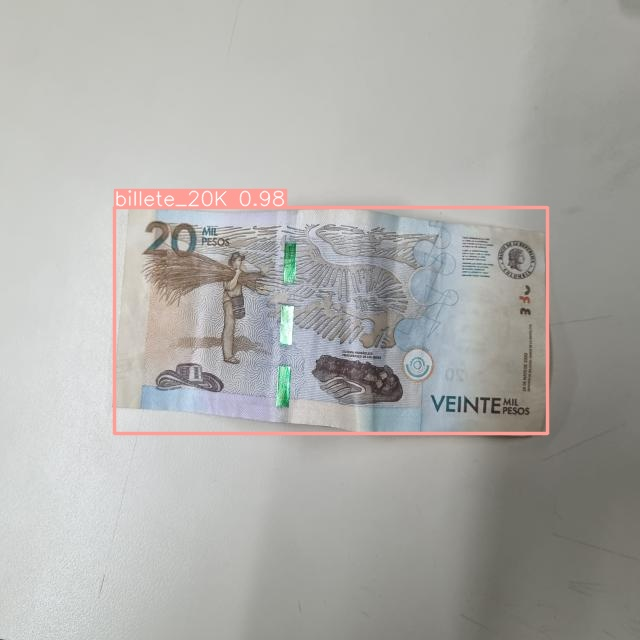

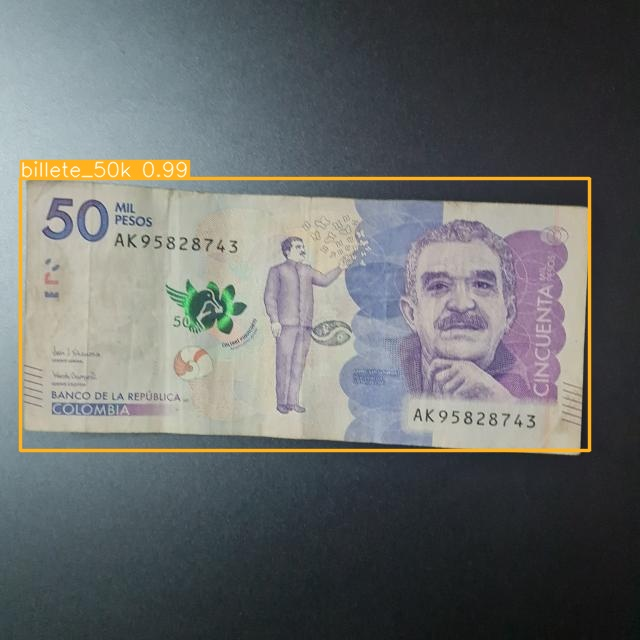

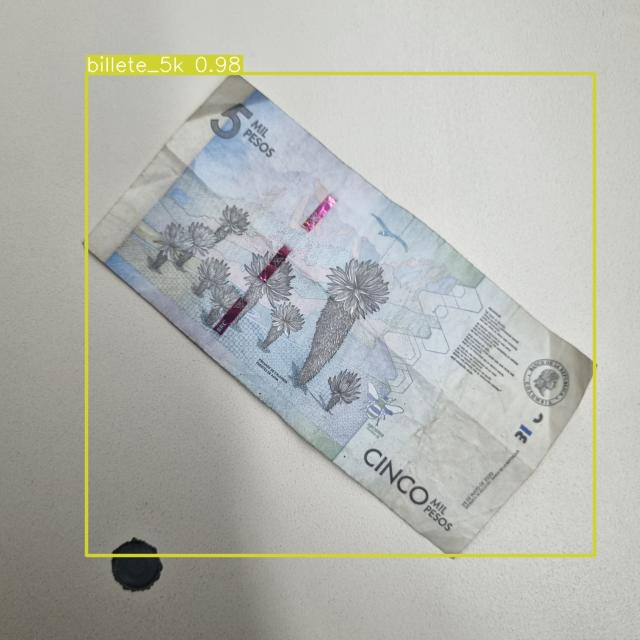

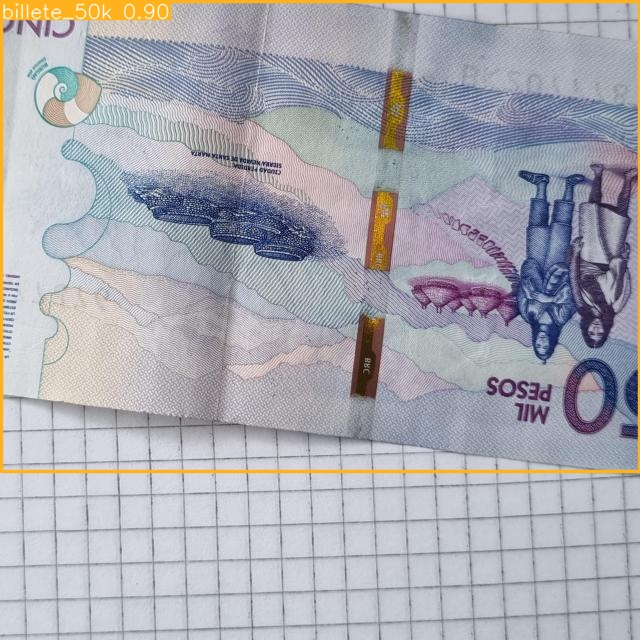

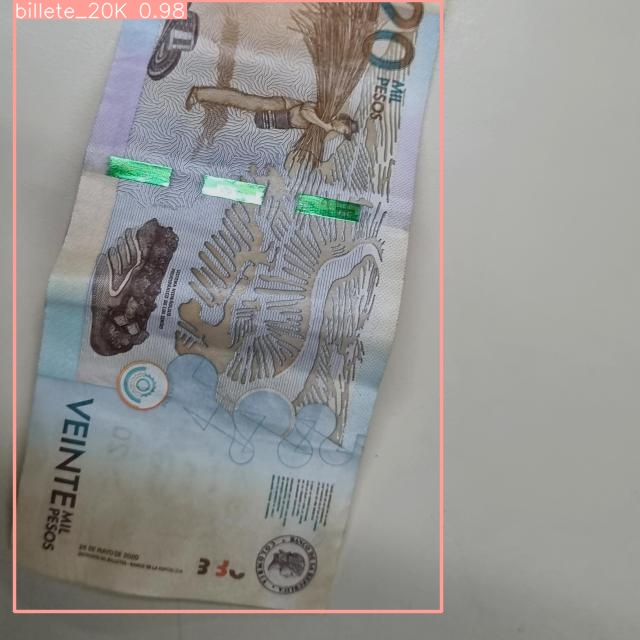

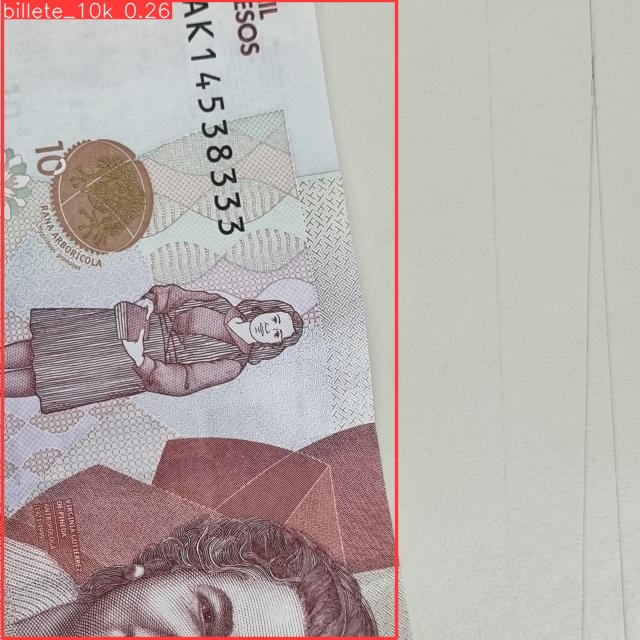

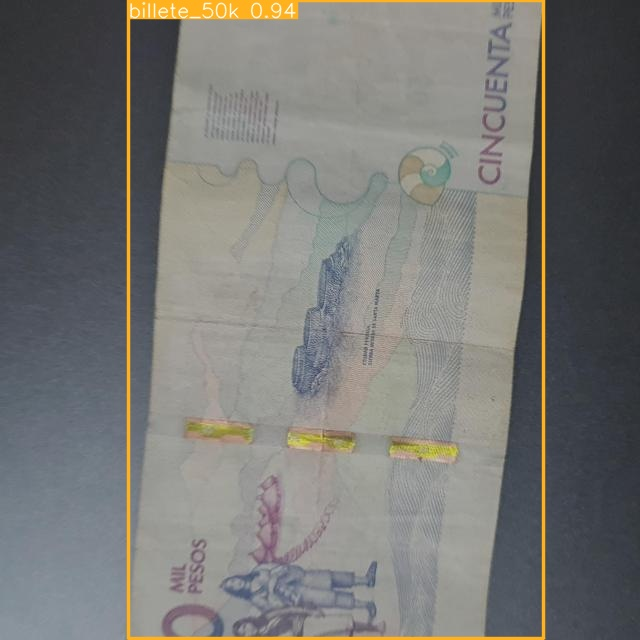

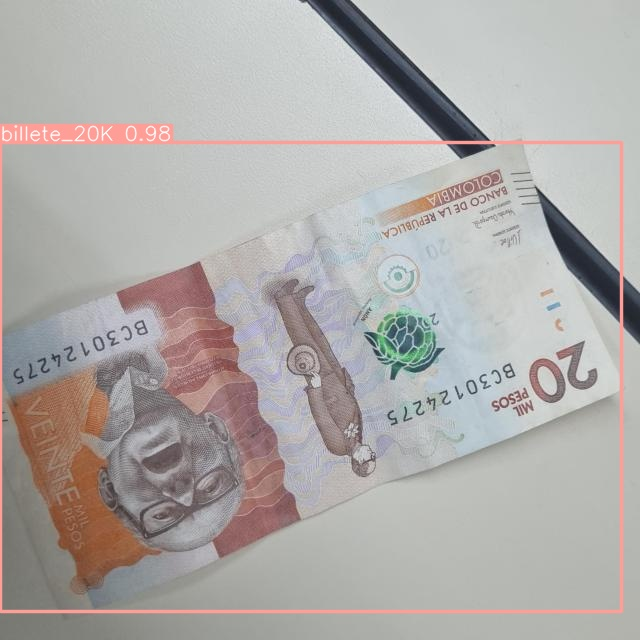

In [ ]:
# Mostrar imágenes predichas durante el entrenamiento
for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:9]:
      display(Image(filename=image_path, width=640))
      print("\n")

In [ ]:
# Exportar el modelo
model.export()

Ultralytics YOLOv8.2.26 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from '/content/runs/detect/train/weights/kowalskibank_yolov8n.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 9, 8400) (6.0 MB)

TorchScript: starting export with torch 2.3.0+cu121...
TorchScript: export success ✅ 3.3s, saved as '/content/runs/detect/train/weights/kowalskibank_yolov8n.torchscript' (11.9 MB)

Export complete (5.1s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=/content/runs/detect/train/weights/kowalskibank_yolov8n.torchscript imgsz=640  
Validate:        yolo val task=detect model=/content/runs/detect/train/weights/kowalskibank_yolov8n.torchscript imgsz=640 data=/content/datasets/Kowalsky-Bank-1/data.yaml  
Visualize:       https://netron.app


'/content/runs/detect/train/weights/kowalskibank_yolov8n.torchscript'

In [ ]:
# Carga del modelo exportado para segmentación
kowalskibank_dec = YOLO(kowalskibank)

# Definición de la ruta del archivo de imagen
source = '/content/datasets/Kowalsky-Bank-5/valid/images/20240529_110857_jpg.rf.502134dc8940226f61950a5383a98033.jpg'

# Ejecución de inferencia en la imagen de origen utilizando el modelo exportado
kowalskibank_dec.predict(source, save=True, imgsz=320, conf=0.5)


image 1/1 /content/datasets/Kowalsky-Bank-5/valid/images/20240529_110857_jpg.rf.502134dc8940226f61950a5383a98033.jpg: 320x320 1 billete_20K, 10.0ms
Speed: 1.1ms preprocess, 10.0ms inference, 2.0ms postprocess per image at shape (1, 3, 320, 320)
Results saved to runs/detect/predict2


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'billete_10k', 1: 'billete_20K', 2: 'billete_2k', 3: 'billete_50k', 4: 'billete_5k'}
 obb: None
 orig_img: array([[[182, 190, 190],
         [182, 190, 190],
         [182, 190, 190],
         ...,
         [153, 158, 159],
         [153, 158, 159],
         [153, 158, 159]],
 
        [[182, 190, 190],
         [182, 190, 190],
         [182, 190, 190],
         ...,
         [153, 158, 159],
         [153, 158, 159],
         [153, 158, 159]],
 
        [[182, 190, 190],
         [182, 190, 190],
         [182, 190, 190],
         ...,
         [153, 158, 159],
         [153, 158, 159],
         [153, 158, 159]],
 
        ...,
 
        [[199, 200, 196],
         [199, 200, 196],
         [199, 200, 196],
         ...,
         [116, 124, 124],
         [116, 124, 124],
         [116, 124, 124]],
 
        [[198, 199, 195],
         

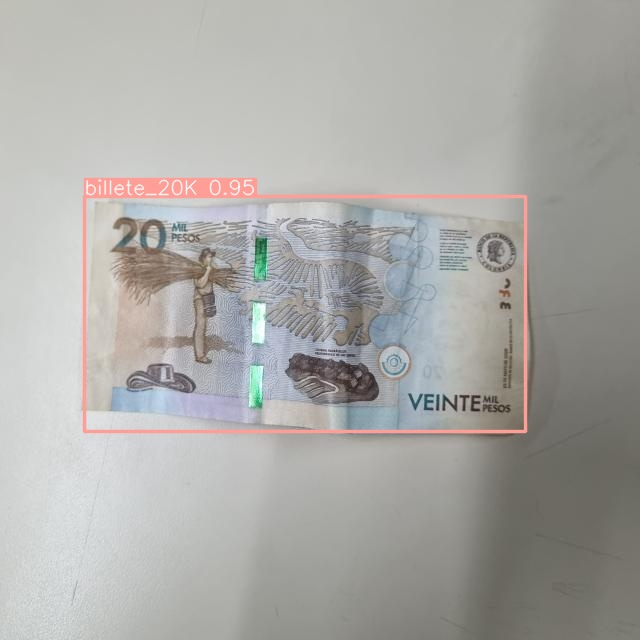

In [ ]:
# Mostrar la imagen después de la inferencia
Image(filename='runs/detect/predict2/20240529_110857_jpg.rf.502134dc8940226f61950a5383a98033.jpg', height=640)